### **Latent Factor Model**

In [41]:
# Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix
from numpy.linalg import norm
import math

In [3]:
# Reading the training dataset
Training_movies = pd.read_csv('/content/training_dataset.csv', sep=',', error_bad_lines=False)

In [4]:
# calculate mean rating
mean_rating = pd.DataFrame(Training_movies.groupby('item_id')['rating'].mean())

In [5]:
mean_rating['ratingCount'] = pd.DataFrame(Training_movies.groupby('item_id')['rating'].count())

In [ ]:
# take the pivot of the data read for further use
ratings_p = Training_movies.pivot(index='user_id', columns='item_id', values="rating").fillna(0)


In [24]:
# Create Data matrix 
data = coo_matrix(ratings_p.values)


In [45]:

M,N=data.shape #  Factor matrix shape - dimensions for P and Q

K=25  #global variable for no of factors
K=math.ceil(np.sqrt(5/K))
# Initialize - using random values of P and Q 
P=np.random.rand(M,K)
Q=np.random.rand(K,N)

In [46]:
#Computing Mean Squared Error
def error(data,P,Q,lamda):
    ratings = data.data
    rows = data.row
    cols = data.col
    error = 0 
    for ui in range(len(ratings)):
        ri=ratings[ui]
        u = rows[ui]
        i = cols[ui]
        if ri>0:
            error= error + pow(ri-np.dot(P[u,:],Q[:,i]),2)+\
                lamda*(pow(norm(P[u,:]),2)+pow(norm(Q[:,i]),2))
    all_errors.append(error)
    return error

In [47]:
# Implement Stochastic Gradient Descent 
def SGD(R, K, lamda,steps, gamma):
    
    M,N = R.shape
    P = np.random.rand(M,K)
    Q = np.random.rand(K,N)
    
    for step in range(steps):
        for ui in range(len(R.data)):
            ri=R.data[ui]
            #print(rui)
            u = R.row[ui]
            #print(u)
            i = R.col[ui]
            #print(i)
            if ri>0:
              # calculate the partial derivative and optimize the P and Q values for the dataset
                ei=ri-np.dot(P[u,:],Q[:,i])
                P[u,:]=P[u,:]+gamma*(ei*Q[:,i]-lamda*P[u,:])
                Q[:,i]=Q[:,i]+gamma*(ei*P[u,:]-lamda*Q[:,i])
        error(R,P,Q,lamda)

    return P,Q

In [48]:
all_errors = [] # variable to store errors to plot the graph for objective function E 
P,Q=SGD(data,K=25,lamda=0.1, steps=40, gamma=0.01) # call SGD method to implement Stochastic Gradient Descent for P,Q 

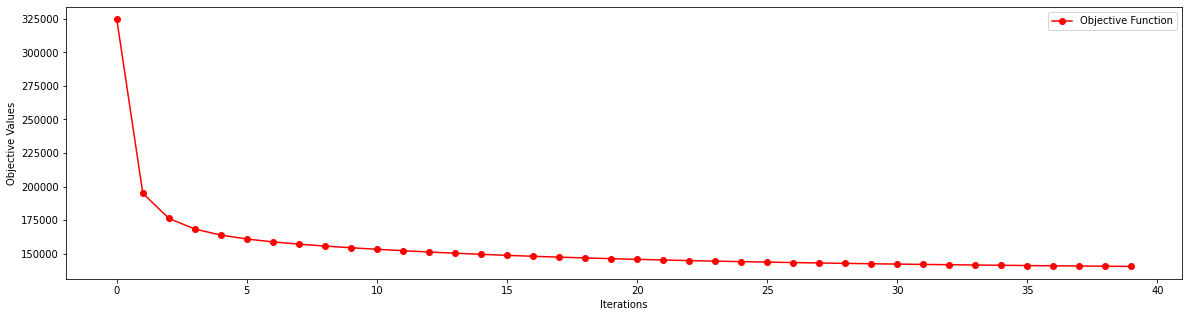

In [49]:
# Plot the value of the objective function E 
plt.rcParams["figure.figsize"]=20,5
plt.plot(all_errors,'r',marker='o',label='Objective Function')
plt.xlabel("Iterations")
plt.ylabel("Objective Values")
plt.legend(loc='best')

In [50]:
Total_user_ratings =np.matmul(P, Q)

In [51]:
# Reading the test dataset
test_movies = pd.read_csv('test_dataset.csv', sep=',', error_bad_lines=False)

In [52]:
predicted_val = []
# Predicting the rating for test dataset from the training dataset
for m in range(test_movies['user_id'].count()):
    i = test_movies['user_id'][m]
    j = test_movies['item_id'][m]
    #print(i)
    #print(j)
    val = Total_user_ratings[i-1][j-1]
    predicted_val.append(val)
    #print(val)    

In [53]:
Actual_val = test_movies['rating']

In [54]:
# Method for Model Evaluation by calculating RMSE -  code snippet given by the professor
from sklearn.metrics import mean_squared_error
from math import sqrt
def RMSE(y_actual, y_predicted):
    rms = sqrt(mean_squared_error(y_actual, y_predicted))
    return round(rms,4)

In [56]:
# Compare ‘actual_rating’ and ‘predicted_rating’ with Root Mean Squared Error (RMSE). 
RMSE_Val = RMSE(Actual_val,predicted_val)
print(RMSE_Val)

0.9737
